In [1]:
pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


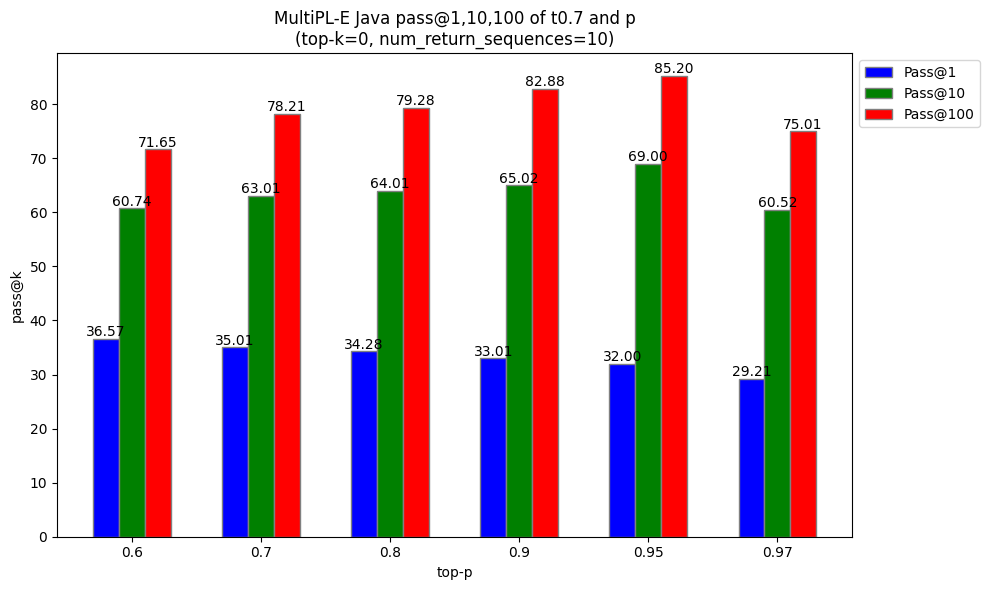

In [2]:
import matplotlib.pyplot as plt
import numpy as np

top_k=0
num_return_sequences = 10

# Pass Scores
t=0.7
temperature = [t]*6
top_p = [0.6, 0.7, 0.8, 0.9, 0.95, 0.97]
# actual 36.57	60.74	71.65
pass_at_1 = [36.57, 35.01, 34.28, 33.01, 32.00, 29.21]
pass_at_10 = [60.74, 63.01, 64.01, 65.02, 69.00, 60.52]
pass_at_100 = [71.65, 78.21, 79.28, 82.88, 85.20, 75.01]

# pass_at_1 = [35.62, 35.01, 34.28, 33.01, 32.00, 29.21]
# pass_at_10 = [61.51, 63.01, 64.01, 65.02, 69.00, 60.52]
# pass_at_100 = [76.68, 78.21, 79.28, 82.88, 85.20, 75.01]


# Plotting
bar_width = 0.2
r1 = np.arange(len(top_p))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10,6))

# Plot bars for Pass@1, Pass@10, Pass@100
plt.bar(r1, pass_at_1, color='blue', width=bar_width, edgecolor='grey', label='Pass@1')
plt.bar(r2, pass_at_10, color='green', width=bar_width, edgecolor='grey', label='Pass@10')
plt.bar(r3, pass_at_100, color='red', width=bar_width, edgecolor='grey', label='Pass@100')

# Loop through bars to add values at the top
for i in range(len(pass_at_1)):
    plt.text(r1[i], pass_at_1[i] + 0.5, f'{pass_at_1[i]:.2f}', ha='center')
    plt.text(r2[i], pass_at_10[i] + 0.5, f'{pass_at_10[i]:.2f}', ha='center')
    plt.text(r3[i], pass_at_100[i] + 0.5, f'{pass_at_100[i]:.2f}', ha='center')

# Add labels and ticks
plt.xlabel('top-p')
plt.xticks([r + bar_width for r in range(len(top_p))], top_p)

plt.ylabel("pass@k")

plt.title(
    f"MultiPL-E Java pass@1,10,100 of t0.7 and p\n(top-k={top_k}, num_return_sequences={num_return_sequences})")
# Adjust legend location and plot layout to avoid hiding the last bar
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Adjust the right padding to make space for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.tight_layout()
# plt.show()

# # Set x and y ticks step
# plt.xticks(np.arange(0.1, 1.1, 0.1))
# plt.yticks(np.arange(20, 90, 5))

plt.savefig(f"java pass@k t{t} vs p.jpg", format="jpg", dpi=1024)